In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))

## Import annotation

In [2]:
### set directory
FD_MTF = file.path(
    FD_ANN, 
    "motif_cluster_jvierstra", 
    "hg38_archetype_motifs_v1",
    "chr17"
)

### set column names
cnames  = c("Chrom", "Start", "End", "Motif", "Score")

In [3]:
### set path for NR/20
fdiry = FD_MTF
fname = "NR_20_merge.bed"
fpath = file.path(fdiry, fname)

### import
dat_mtf_nr20 = read_tsv(
    fpath, 
    col_names = cnames,
    show_col_types = FALSE)
head(dat_mtf_nr20, 3)

Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr17,60454,60468,NR/20,8.3104
chr17,60718,60732,NR/20,8.8112
chr17,63497,63512,NR/20,7.7355


In [4]:
### set path for NR/20
fdiry = FD_MTF
fname = "AP1_1_merge.bed"
fpath = file.path(fdiry, fname)

### import
dat_mtf_ap11 = read_tsv(
    fpath, 
    col_names = cnames,
    show_col_types = FALSE)
head(dat_mtf_ap11, 3)

Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr17,61128,61136,AP1/1,8.0116
chr17,63311,63319,AP1/1,7.6561
chr17,64199,64207,AP1/1,7.6561


In [5]:
### set path for NR/20
fdiry = FD_MTF
fname = "AP1_2_merge.bed"
fpath = file.path(fdiry, fname)

### import
dat_mtf_ap12 = read_tsv(
    fpath, 
    col_names = cnames,
    show_col_types = FALSE)
head(dat_mtf_ap11, 3)

Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr17,61128,61136,AP1/1,8.0116
chr17,63311,63319,AP1/1,7.6561
chr17,64199,64207,AP1/1,7.6561


## Import bed

In [6]:
print(FD_RES)

[1] "/home/mount/work/out/proj_combeffect"


In [7]:
dir(FD_RES)

[1] "annotation_fragment" "count_fragment"      "coverage"           
[4] "data"                "log"                 "model_linear"       
[7] "source"

In [8]:
FD_BED = file.path(
    FD_RES,
    "data",
    "TFX2_Dex"
)
FN_BED = "chr17.bed"
FP_BED = file.path(FD_BED, FN_BED)

In [9]:
cnames  = c("Chrom", "Start", "End")
dat_bed = read_tsv(
    FP_BED,
    col_names = cnames,
    show_col_types = FALSE)
head(dat_bed, 3)

Chrom,Start,End
<chr>,<dbl>,<dbl>
chr17,83638,84547
chr17,92503,93508
chr17,152590,153715


## Visualization

In [10]:
dat = dat_bed
dat = dat %>% dplyr::filter(8148000 <= Start, Start <= 8160000)
dat = dat %>% mutate(Index = 1:nrow(dat))
dat1 = dat

print(dim(dat1))
head(dat1, 3)

[1] 2467    4


Chrom,Start,End,Index
<chr>,<dbl>,<dbl>,<int>
chr17,8148000,8148888,1
chr17,8148097,8149186,2
chr17,8148180,8149106,3


In [11]:
dat = dat_mtf_nr20
dat = dat %>% dplyr::filter(8148000 <= Start, Start <= 8160000)
dat = dat %>% dplyr::filter(Score >= 9.84)
#dat = dat %>% dplyr::filter(Score >= 10.81)
dat21 = dat

print(dim(dat21))
head(dat21, 3)

[1] 2 5


Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr17,8151912,8151926,NR/20,11.8641
chr17,8154459,8154474,NR/20,15.3477


In [62]:
dat = dat_mtf_ap11
dat = dat %>% dplyr::filter(8148000 <= Start, Start <= 8160000)
dat = dat %>% dplyr::filter(Score >= 9.84)
#dat = dat %>% dplyr::filter(Score >= 10.81)
#dat = dat %>% dplyr::filter(Score >= 7.80)
dat22 = dat

print(dim(dat22))
head(dat22, 3)

[1] 0 5


Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>


In [63]:
dat = dat_mtf_ap12
dat = dat %>% dplyr::filter(8148000 <= Start, Start <= 8160000)
dat = dat %>% dplyr::filter(Score >= 9.84)
#dat = dat %>% dplyr::filter(Score >= 10.81)
#dat = dat %>% dplyr::filter(Score >= 7.80)

dat22 = dat

print(dim(dat22))
head(dat22, 3)

[1] 1 5


Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr17,8158098,8158109,AP1/2,10.8123


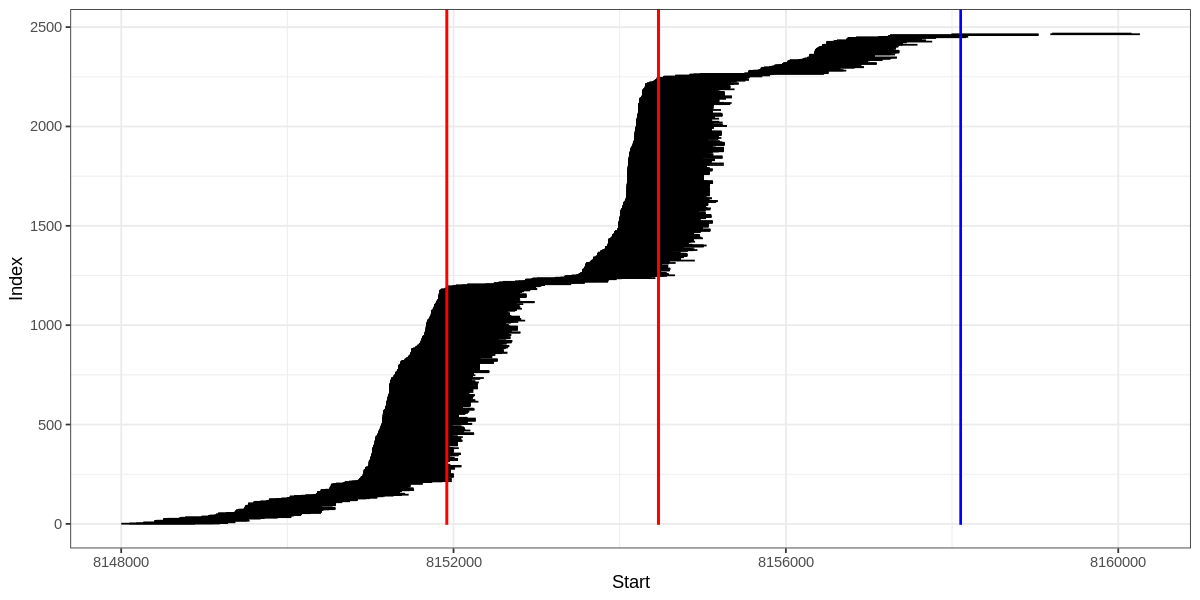

In [60]:
options(repr.plot.height=5, repr.plot.width=10)
ggplot() +
    geom_segment(
        aes(x = Start, y = Index, xend = End, yend = Index),
        data = dat1) +
    geom_rect(
        aes(xmin=Start, xmax=End, ymin=0, ymax=Inf),
        data = dat21,
        color = "red") +
    geom_rect(
        aes(xmin=Start, xmax=End, ymin=0, ymax=Inf),
        data = dat22,
        color = "blue") +
    theme_bw()

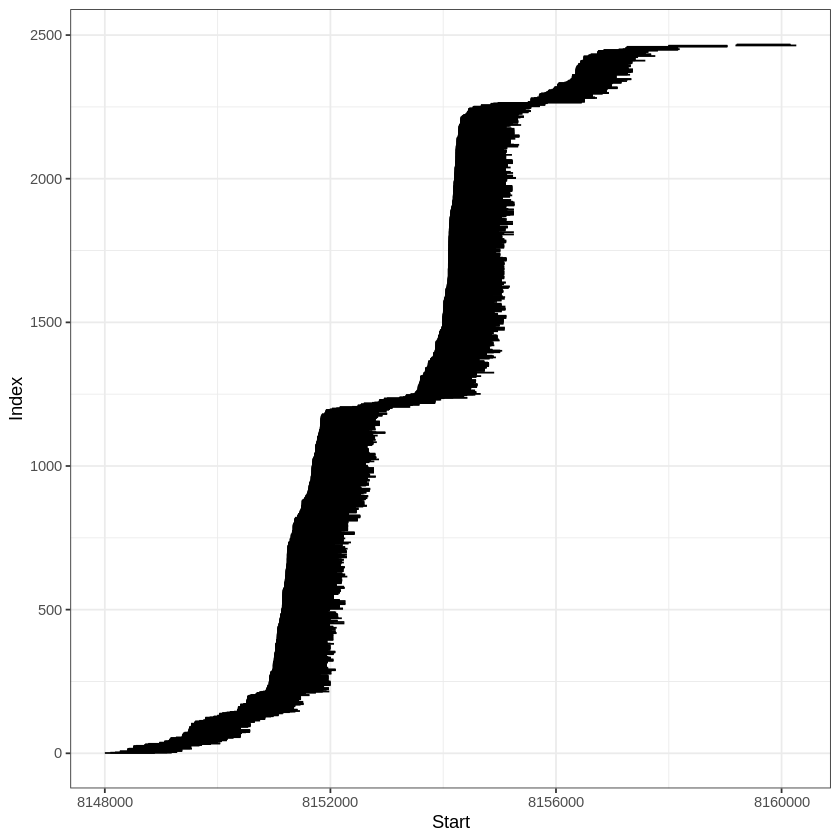

In [20]:
ggplot(dat1, aes(x = Start, y = Index, xend = End, yend = Index)) +
    geom_segment() +
    theme_bw()

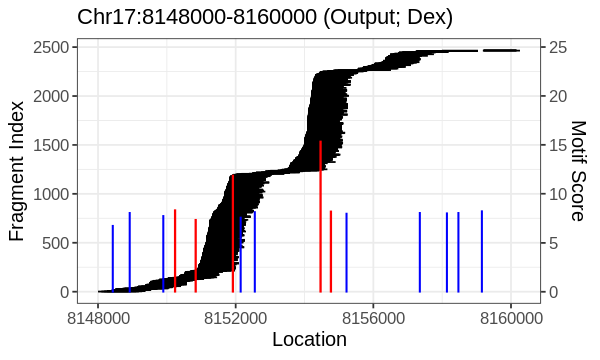

In [14]:
###
dat = dat_bed
dat = dat %>% dplyr::filter(8148000 <= Start, Start <= 8160000)
dat = dat %>% mutate(Index = 1:nrow(dat))
dat1 = dat

###
start = 8148000
end   = 8160000
dat2  = dat_mtf_nr20 %>% dplyr::filter(start <= Start, Start <= end)
dat31 = dat_mtf_ap11 %>% dplyr::filter(start <= Start, Start <= end)
dat32 = dat_mtf_ap12 %>% dplyr::filter(start <= Start, Start <= end)


coeff=100
options(repr.plot.height=3, repr.plot.width=5)
ggplot() +
    geom_segment(
        aes(x = Start, y = Index, xend = End, yend = Index),
        data = dat1) +
    geom_rect(
        aes(xmin=Start, xmax=End, ymin=0, ymax=Score*coeff),
        data = dat2,
        color = "red") +
    geom_rect(
        aes(xmin=Start, xmax=End, ymin=0, ymax=Score*coeff),
        data = dat31,
        color = "blue") +
    #geom_rect(
    #    aes(xmin=Start, xmax=End, ymin=0, ymax=Score*coeff),
    #    data = dat32,
    #    color = "chartreuse4") +
    scale_y_continuous( 
        # Features of the first axis
        name = "Fragment Index",
        # Add a second axis and specify its features
        sec.axis = sec_axis(~./coeff, name="Motif Score")) +
    theme_bw() +
    theme(
        axis.text.x        = element_text(size=10),
        axis.text.y        = element_text(size=10),
        axis.text.y.right  = element_text(size=10),
        axis.title.x       = element_text(size=12),
        axis.title.y       = element_text(size=12),
        axis.title.y.right = element_text(size=12)
    ) +
    labs(x="Location", title="Chr17:8148000-8160000 (Output; Dex)")

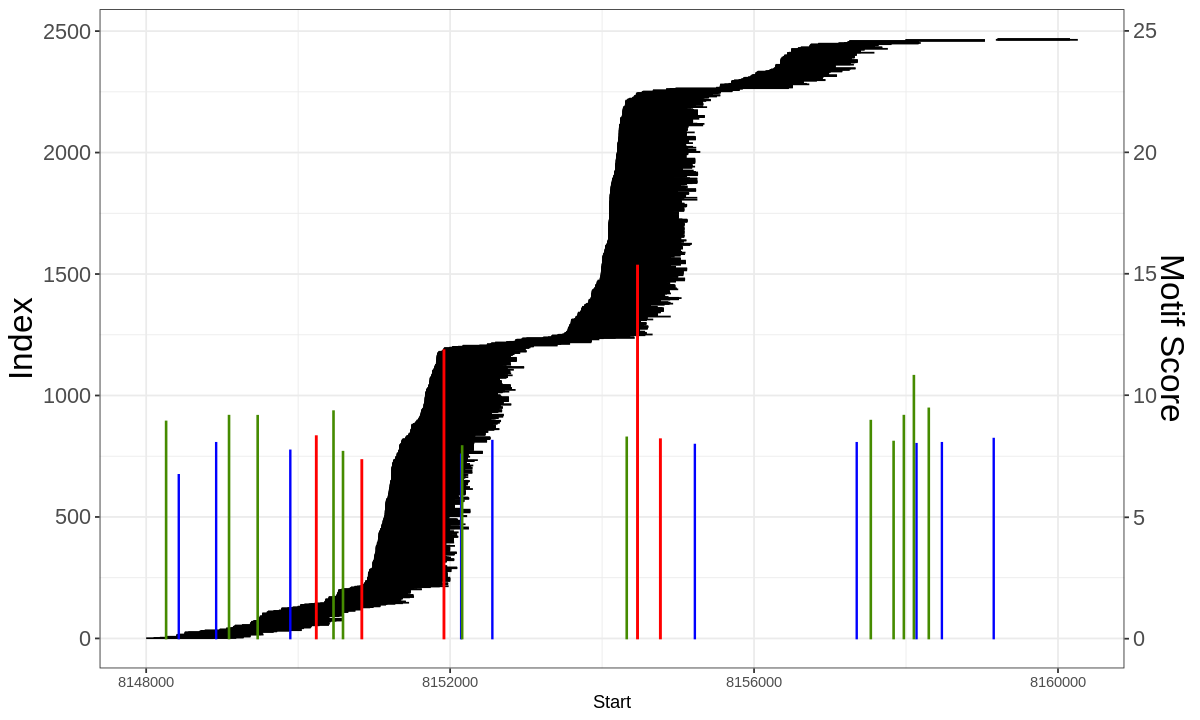

In [87]:
###
dat = dat_bed
dat = dat %>% dplyr::filter(8148000 <= Start, Start <= 8160000)
dat = dat %>% mutate(Index = 1:nrow(dat))
dat1 = dat

###
dat2  = dat_mtf_nr20 %>% dplyr::filter(8148000 <= Start, Start <= 8160000)
dat31 = dat_mtf_ap11 %>% dplyr::filter(8148000 <= Start, Start <= 8160000)
dat32 = dat_mtf_ap12 %>% dplyr::filter(8148000 <= Start, Start <= 8160000)


coeff=100
options(repr.plot.height=6, repr.plot.width=10)
ggplot() +
    geom_segment(
        aes(x = Start, y = Index, xend = End, yend = Index),
        data = dat1) +
    geom_rect(
        aes(xmin=Start, xmax=End, ymin=0, ymax=Score*coeff),
        data = dat2,
        color = "red") +
    geom_rect(
        aes(xmin=Start, xmax=End, ymin=0, ymax=Score*coeff),
        data = dat31,
        color = "blue") +
    geom_rect(
        aes(xmin=Start, xmax=End, ymin=0, ymax=Score*coeff),
        data = dat32,
        color = "chartreuse4") +
    scale_y_continuous( 
        # Features of the first axis
        name = "Index",
        # Add a second axis and specify its features
        sec.axis = sec_axis(~./coeff, name="Motif Score")) +
    theme_bw() +
    theme(
        axis.text.y        = element_text(size=13),
        axis.text.y.right  = element_text(size=13),
        axis.title.y       = element_text(size=20),
        axis.title.y.right = element_text(size=20)
    )